In [1]:
import torch
import numpy as np

In [22]:
import matplotlib.pyplot as plt

==============================================================================

__Commonly used functions and operations

==============================================================================

In [8]:
# Check for GPU availability
torch.cuda.is_available()

True

==============================================================================

__Basic tensor manipulations

https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html

==============================================================================

In [130]:
# Example
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(f"Inline data = {data}")
np_data = np.ones((3,3)) # NumPy
print(f"NumPy data = {np_data}")
np.add(np_data, 1, out=np_data)
print(f"NumPy data = {np_data}")

Inline data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
NumPy data = [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
NumPy data = [[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


In [127]:
# Assigning data to a tensor
tensor_a = torch.tensor(data)
print(tensor_a, tensor_a.shape)
tensor_a_from_np = torch.from_numpy(np_data)
print(tensor_a_from_np)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]) torch.Size([3, 3])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], dtype=torch.float64)


In [29]:
# Create a random tensor with uniform distribution of the x_data's shape
rand_tensor = torch.rand(tensor_a.shape)

# Create a tensor of ones of the x_data's shape
ones_tensor = torch.ones(tensor_a.shape)

# Create a tensor of ones with the tensor x_data
ones_like = torch.ones_like(tensor_a)

# Create a tensor of zeroes of the x_data shape
zeros_tensor = torch.zeros(tensor_a.shape)

# Create a tensor of zeroes with the tensor x_data
zeros_like = torch.zeros_like(tensor_a)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Ones Like Tensor: \n {ones_like} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")
print(f"Zeroes Like Tensor: \n {zeros_like} \n")

Random Tensor: 
 tensor([[0.2929, 0.7580, 0.5592],
        [0.8401, 0.8230, 0.6283]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Ones Like Tensor: 
 tensor([[1, 1, 1],
        [1, 1, 1]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Zeroes Like Tensor: 
 tensor([[0, 0, 0],
        [0, 0, 0]]) 



In [27]:
# Moving tensors to a GPU
tensor = torch.rand((3,4), device="cuda")
if torch.cuda.is_available():
    tensor.to('cuda')

# Attributes of a tensor: shape, dtype, device
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cuda:0


In [36]:
# Indexing and Slicing
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [67]:
# Joining tensors
tensor_a = torch.ones(3,3)
tensor_b = torch.ones(3,3) + torch.ones(1)
print(f'{tensor_a, tensor_a.shape}')
print(f'{tensor_b, tensor_b.shape}')

print('Joined on dim=0 (or add into rows):')
cat_dim0 = torch.cat([tensor_a, tensor_b], dim=0)
print(cat_dim0, cat_dim0.shape)
print('Joined on dim=1 (or add into columns):')
cat_dim1 = torch.cat([tensor_a, tensor_b], dim=1)
print(cat_dim1, cat_dim1.shape)

(tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), torch.Size([3, 3]))
(tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]]), torch.Size([3, 3]))
Joined on dim=0 (or add into rows):
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]]) torch.Size([6, 3])
Joined on dim=1 (or add into columns):
tensor([[1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 2., 2., 2.],
        [1., 1., 1., 2., 2., 2.]]) torch.Size([3, 6])


==============================================================================

__Arithmetic operations

==============================================================================

In [84]:
# Matrix Multiplication

# tensor_a = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
tensor_a = torch.ones(3,3)
print(tensor_a)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [91]:
tensor_b = torch.tensor([
    [1, 1, 1], 
    [2, 2, 2], 
    [3, 3, 3],
    [4, 4, 4]], dtype=torch.float32)
print(tensor_b, tensor_b.shape)
print(tensor_b.T) # Tranposed

tensor([[1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.],
        [4., 4., 4.]]) torch.Size([4, 3])
tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]])


In [106]:
tensor_c = tensor_a @ tensor_b.T # Matrix multiplication
tensor_c

tensor([[ 3.,  6.,  9., 12.],
        [ 3.,  6.,  9., 12.],
        [ 3.,  6.,  9., 12.]])

In [103]:
tensor_d = torch.rand_like(tensor_a) # We initialize tensor_d with the shape of tensor_a
tensor_d

tensor([[0.5891, 0.0136, 0.6542],
        [0.1072, 0.7368, 0.9313],
        [0.1151, 0.5178, 0.8077]])

In [105]:
torch.matmul(tensor_a, tensor_a.T, out=tensor_d) # tensor_a * tensor_a.T = ones(3,3) * ones(3,3)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [115]:
tensor_e = tensor_a * tensor_a # This is element-wise product
print(tensor_e)
tensor_f = tensor_a.mul(tensor_a) # This is element-wise product
print(tensor_f)
tensor_g = torch.rand_like(tensor_a) # Get the shape
torch.mul(tensor_a, tensor_a, out=tensor_g) # This is element-wise product
print(tensor_f)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [9]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [10]:
Q = 3*a**3 - b**2
Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [11]:
a.grad, b.grad

(None, None)

In [12]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)
a.grad, b.grad
Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

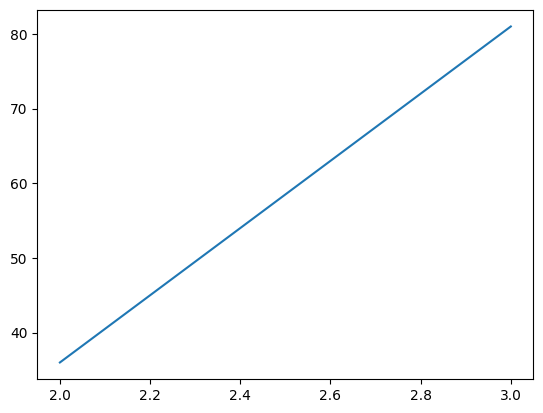

In [23]:
plt.plot(a.detach(), a.grad.detach())

In [5]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import torch
from torch import nn
import torchviz

In [6]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear1 = nn.Linear(3, 4)
        self.linear2 = nn.Linear(4, 2)

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

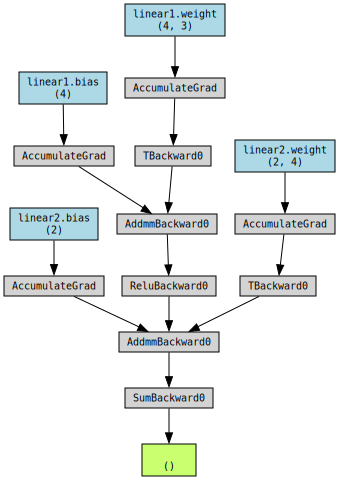

In [8]:
model = SimpleModel()
x = torch.randn(1, 3)   
output = model(x)
loss = output.sum()
loss.backward()
torchviz.make_dot(loss, params=dict(model.named_parameters()))

In [10]:
import torch

logp_b = torch.tensor([
    [-0.6, -0.4, -0.2],
    [-0.5, -0.2, -0.3],
    [-0.7, -0.1, -0.2],
    [-0.6, -0.3, -0.1]
])

y_b = torch.tensor([2, 1, 1, 2])
# for each row of logp_b, select the column given by y_b
correct_logprobs = logp_b[range(y_b.shape[0]), y_b]
print(correct_logprobs)
correct_logprobs_list = correct_logprobs.tolist()
print(['{:.2f}'.format(num) for num in correct_logprobs_list])

tensor([-0.2000, -0.2000, -0.1000, -0.1000])
['-0.20', '-0.20', '-0.10', '-0.10']


`LogSumExp` efficiently computes the sum of exponentiated values, ensuring stability and precision with small or large numbers.

https://gregorygundersen.com/blog/2020/02/09/log-sum-exp/

In [21]:
# NumPy example
import numpy as np
def logsumexp(x):
    c = x.max()
    return c + np.log(np.sum(np.exp(x - c)))
x = np.array([-1000, -1000, 1000])
# print(np.exp(x)) # [0. 0. inf] NumPy Overflow
print(np.exp(x - logsumexp(x)))

[0. 0. 1.]


In [23]:
# PyTorch example
import torch

def logsumexp(x):
    c = x.max()
    return c + torch.log(torch.sum(torch.exp(x - c)))

x = torch.tensor([-1000., -1000., 1000.])
print(torch.exp(x))
print(torch.exp(x - logsumexp(x)))

tensor([0., 0., inf])
tensor([0., 0., 1.])
